### Eigenvalue & Eigenvector with numpy

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd

testmatrix = np.array([[2,1],
                        [1,2]])

#Eigenvalue와 Eigenvector
print (lin.eig(testmatrix)) 

#Eigenvalue
print (lin.eig(testmatrix)[0])  
#Eigenvector
print (lin.eig(testmatrix)[1]) 

(array([3., 1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [2]:
mat = lin.eig(testmatrix)[1]
print(mat[:,0])
print(mat[:,1])

[0.70710678 0.70710678]
[-0.70710678  0.70710678]


In [3]:
# k0'*k0 = 1 : 단위 벡터
mat[:,0].T.dot(mat[:,0])

0.9999999999999998

### PCA 간단예제

In [4]:

np.random.seed(0)

In [5]:
# 랜덤값 생성
x = np.random.randn(100)
x2 = 0.5*x + np.random.randn(100)*0.3
# print(x)
# print(y)
X = pd.DataFrame({'x1':x,'x2':x2})

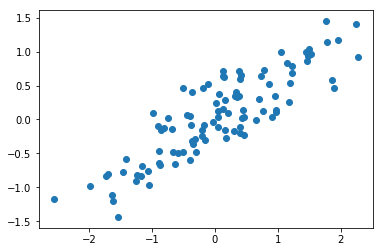

In [6]:
plt.scatter(X['x1'],X['x2'])

In [7]:
# 공분산행렬
mat = X.cov()
mat

,x1,x2
x1,1.026087,0.548351
x2,0.548351,0.389150


### 공분산행렬 변환

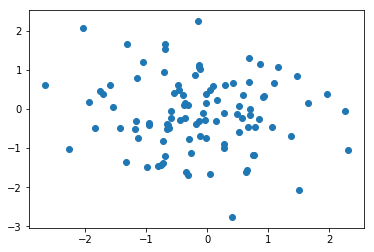

In [8]:
# 2차원 공간벡터
data = np.random.randn(200).reshape(100,2)
plt.scatter(data[:,0],data[:,1])

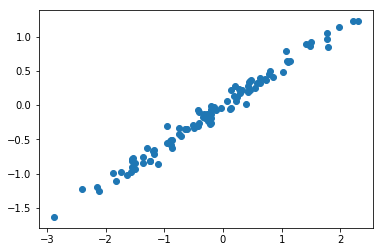

In [9]:
data2 = data.dot(mat)
plt.scatter(data2[:,0],data2[:,1])

### 공분산행렬 스펙트럼 분해

In [10]:
lin.eig(mat)

(array([1.34174117, 0.07349682]), array([[ 0.86666587, -0.49888903],
        [ 0.49888903,  0.86666587]]))

In [11]:
k1 = lin.eig(mat)[1][:,0]

In [12]:
k2 = lin.eig(mat)[1][:,1]

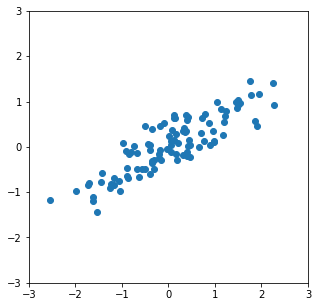

In [13]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2']);

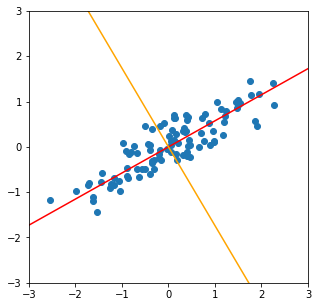

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2'])

# 고유벡터 시각화
plt.plot([-4*k1[0],4*k1[0]],[-4*k1[1],4*k1[1]],c='red')
plt.plot([-4*k2[0],4*k2[0]],[-4*k2[1],4*k2[1]],c='orange')

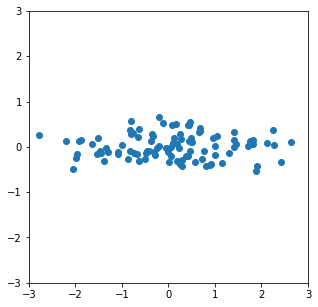

In [15]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 회전된 결과
PC1 = k1.dot(X.T)
# PC1 = k1[0]*X['x1'] + k1[1]*X['x2']
PC2 = k2.dot(X.T)
# PC2 = k2[0]*X['x1'] + k2[1]*X['x2']

plt.scatter(PC1,PC2);

### sklearn PCA

In [16]:
from sklearn.decomposition import PCA

# 2개로 축소 
model = PCA(n_components=2)

# fit : component 생성
# transform : 변환후 반환
# fit_transform : fit과 transform 동시 적용

pca_features = model.fit_transform(X)

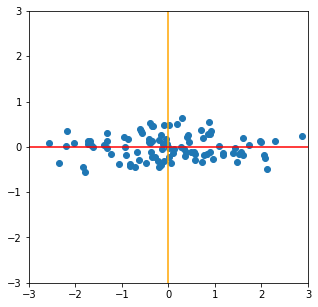

In [17]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

PC1 = pca_features[:,0]
PC2 = pca_features[:,1]

plt.scatter(PC1,PC2)

plt.plot([0,0],[-3,3],c='orange');
plt.plot([-3,3],[0,0],c='red');

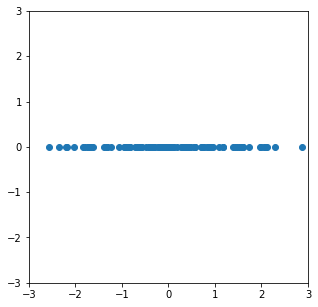

In [18]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 1개의 주성분만 표현
plt.scatter(PC1,len(PC1)*[0]);

# IRIS DATA

In [19]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# 데이터 로드
iris = datasets.load_iris()

In [21]:
labels = np.array(iris.target).reshape(150,)
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

### PCA

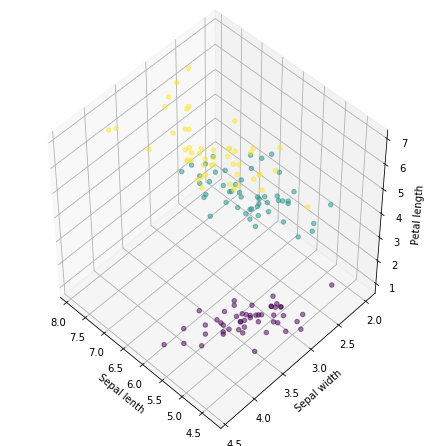

In [22]:
# 3차원
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels,alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

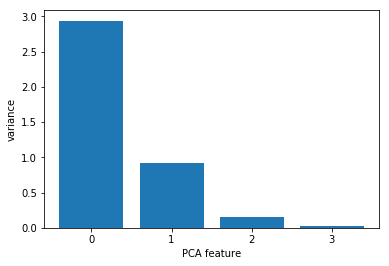

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 정규화
scaler = StandardScaler()

# pca , 디폴트 components는 n(전체 feature 수)
pca = PCA()

# pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

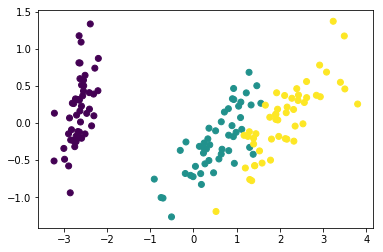

In [24]:
# 2차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels);
plt.show();

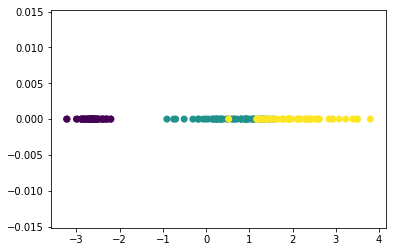

In [25]:
# 1차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels);
plt.show();

### TSNE

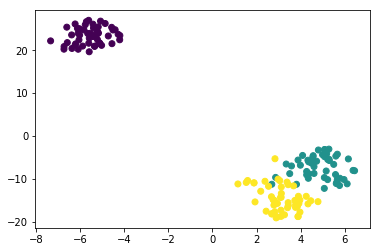

In [26]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(data)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels)

plt.show()

# MNIST DATA

In [27]:
# 데이터 로드
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

X = mnist.data / 255.0
y = mnist.target

print (X.shape, y.shape)

C:\Users\sora\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sora\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다

In [ ]:
import pandas as pd

feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print( 'Size of the dataframe: {}'.format(df.shape) )

In [ ]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax  = fig.add_subplot(3,10,i+1,title='Digit: ' + str(df.loc[rndperm[i], 'label']) )
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))

plt.show()

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print( 'Explained variation per principle component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title("First and Second Principal Components colored by digit", fontsize = 20)

xf = df['pca-one']
yf = df['pca-two']
for i in range(10):
    ax.scatter(xf[y==i],yf[y==i],s=10)
ax.grid()

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print( 'Cumulative explained variation for 50 principal components:',np.sum(pca_50.explained_variance_ratio_))

### TSNE

In [ ]:
import time
from sklearn.manifold import TSNE

# 사용할 데이터,, 너무 오래걸려서 조금만
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, , perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print( 't-SNE done! Time elapsed: {} seconds',time.time() - time_start )

In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE 1', fontsize = 15)
ax.set_ylabel('TSNE 2', fontsize = 15)
ax.set_title("First and Second TSNE colored by digit", fontsize = 20)

xf = df_tsne['x-tsne']
yf = df_tsne['y-tsne']
for i in range(10):
    ax.scatter(xf[y[rndperm[:n_sne]]==i],yf[y[rndperm[:n_sne]]==i],s=10)
ax.grid()


# 과제 3

## Train & Test data

In [3]:
data=pd.read_csv("train.csv")

In [4]:
x=data.iloc[:,1:]

In [5]:
len(x.columns)

784

In [6]:
y=data.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

### original 데이터

In [8]:
#데이터 분할

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
# knn

from sklearn.neighbors import KNeighborsClassifier as knn

In [12]:
time_start = time.time()
knn_model=knn(n_neighbors=5)
knn_model.fit(X_train,Y_train)
print( 'original KNN done! Time elapsed: {} seconds',time.time() - time_start )

# 예측 후 정확도 계산
predicted = knn_model.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)

print('original KNN done! SCORE',knn_model.score(X_test,Y_test))

original KNN done! Time elapsed: {} seconds 5.097526788711548
original KNN done! SCORE 0.9648809523809524


In [14]:
# raondomforest
from sklearn.ensemble import RandomForestClassifier
time_start = time.time()
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, Y_train)

print( 'original RF done! Time elapsed: {} seconds',time.time() - time_start )
predicted = rf.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)


print('original RF done! SCORE',knn_model.score(X_test,Y_test))

original RF done! Time elapsed: {} seconds 25.952762842178345
original RF done! SCORE 0.9648809523809524


In [17]:
from sklearn.decomposition import PCA
pca_a = PCA(n_components=3)

pca_a.fit(X_train)
X_train_pca = pca_a.transform(X_train)

X_test_pca = pca_a.transform(X_test)

In [19]:
#KNN
time_start = time.time()
knn_model=knn(n_neighbors=5)
knn_model.fit(X_train_pca,Y_train)
print( 'PCA KNN done! Time elapsed: {} seconds',time.time() - time_start )

# 예측 후 정확도 계산
predicted = knn_model.predict(X_test_pca)
accuracy = accuracy_score(Y_test, predicted)

print('PCA KNN done! SCORE',knn_model.score(X_test_pca,Y_test))

PCA KNN done! Time elapsed: {} seconds 0.020023584365844727
PCA KNN done! SCORE 0.48488095238095236


In [22]:
# raondomforest
from sklearn.ensemble import RandomForestClassifier
time_start = time.time()
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train_pca, Y_train)

print( 'PCA RF done! Time elapsed: {} seconds',time.time() - time_start )
predicted = rf.predict(X_test_pca)
accuracy = accuracy_score(Y_test, predicted)


print('PCA  RF done! SCORE',knn_model.score(X_test_pca,Y_test))

PCA RF done! Time elapsed: {} seconds 5.489705801010132
PCA  RF done! SCORE 0.48488095238095236


### -> 결과
확실히 차원축소 후에, 모델을 실행시키는 time은 굉장히 단축이 되었지만, 원래의 feature로 진행하지 않았기 때문에,
모델의 정확도가 떨어졌다. 